In [ ]:
import numpy as np
mols = ["H2","CH","CH2","NH","CH3","NH2","OH","HF",
        "H2O","NH3","C2H","CN","C2H2","CO","HCN","N2",
        "HCO","CF","NO","HNO","O2","HO2","OF","H2O2","F2","CO2"]
data_dic = {}
with open("/home/yichi/research/afqmc_cisd_data/heat/ene.dz.txt") as f:
    for line in f:
        parts = line.split()
        species = parts[0]
        data_dic[species] = {}
        data_dic[species]["ccsdt"] = float(parts[1])
        data_dic[species]["ccsdt[q]"] = float(parts[2])
        data_dic[species]["ccsdt(q)"] = float(parts[3])
        data_dic[species]["ccsdtq"] = float(parts[4])
        data_dic[species]["ccsdtqp"] = float(parts[5])

ref = np.array([data_dic[mol]["ccsdtqp"] for mol in mols])
ccsdtq = np.array([data_dic[mol]["ccsdtq"] for mol in mols])

data = np.loadtxt("/home/yichi/research/afqmc_cisd_data/heat/ene.txt", delimiter=",")
afqmc_hf = (data[:, 1] - ref) * 1000
# afqmc_hf_rmsd = np.sqrt(np.mean((afqmc_hf) \*\* 2))
afqmc_hf_stoc_err = data[:, 2] * 1000
# ccsdtq = (ccsdtq - ref) _ 1000
# ccsdtq_rmsd = np.sqrt(np.mean((ccsdtq) \*\* 2))
# ccsdpt = (data[:, 4] - ref) _ 1000
# ccsdpt_rmsd = np.sqrt(np.mean((ccsdpt) ** 2))
afqmc_cisd = (data[:, 5] - ref) * 1000
# afqmc_cisd_rmsd = np.sqrt(np.mean((afqmc_cisd) ** 2))
afqmc_cisd_stoc_err = data[:, 6] *1000

In [8]:
with open("/home/yichi/research/afqmc_cisd_data/heat/ene.dz.txt") as f:
    for line in f:
        parts = line.split()
        print(parts[3])

-109.277059
-199.099411
-149.987783
-37.760710
-99.527760
-54.478664
-74.910131
-113.055979
-77.110663
-76.401147
-39.041638
-38.380225
-39.716057
-151.195317
-76.241662
-113.577505
-100.228632
-150.560452
-129.599819
-75.559673
-130.172966
-92.493159
-93.189954
-137.476115
-55.733060
-56.402513
-55.091681
-174.500248
0.
-1.16343


In [2]:
for i,mol in enumerate(mols):
    data_dic[mol]["afqmc_hf"] = data[i, 1]
    data_dic[mol]["afqmc_cisd"] = data[i, 5]

In [3]:
for i,mol in enumerate(mols):
    data_dic[mol]["afqmc_hf_err(mH)"] = data[i, 2] * 1000
    data_dic[mol]["afqmc_cisd_err(mH)"] = data[i, 6] * 1000

In [15]:
data_dic['N2']

{'ccsdt': -109.275374,
 'ccsdt[q]': -109.276773,
 'ccsdt(q)': -109.277059,
 'ccsdtq': -109.276831,
 'ccsdtqp': -109.277012}

In [28]:
data_dic['O2']

{'ccsdtqp': -149.987773,
 'ccsdtq': -149.987605,
 'afqmc_hf': -149.9792,
 'afqmc_cisd': -149.98592,
 'afqmc_hf_err(mH)': 0.2,
 'afqmc_cisd_err(mH)': 0.1}

In [13]:
my_data = '''
#   Mol          CCSD(T)              AFQMC/CCSD_PT   
    C2H       -76.39855638        -76.399014 +/- 0.000051
    C2H2      -77.10924902        -77.109546 +/- 0.000064
    CF        -137.4748482        -137.475760 +/- 0.000192
    CH        -38.37935551        -38.380189 +/- 0.000024
    CH2       -39.04119570        -39.041474 +/- 0.000006
    CH3       -39.71553966        -39.715980 +/- 0.000010
    CN        -92.48869527        -92.487483 +/- 0.000157
    CO        -113.0544306        -113.055092 +/- 0.000092
    CO2       -188.1474293        -188.148924 +/- 0.000137
    F2        -199.0963839        -199.098269 +/- 0.000057
    H2        -1.163426264        -1.163426 +/- 0.000001
    H2O       -76.24101779        -76.241701 +/- 0.000038
    H2O2      -151.1936301        -151.194724 +/- 0.000058
    HCN       -93.18832063        -93.189107 +/- 0.000157
    HCO       -113.5757054        -113.576087 +/- 0.000097
    HF        -100.2281312        -100.228669 +/- 0.000031
    HNO       -130.1696778        -130.172789 +/- 0.000079
    HO2       -150.5584809        -150.559452 +/- 0.000056
    N2        -109.2752986        -109.276029 +/- 0.000140
    NH        -55.09129056        -55.091499 +/- 0.000007
    NH2       -55.73250631        -55.732956 +/- 0.000013 
    NH3       -56.40191327        -56.402489 +/- 0.000029
    NO        -129.5977782        -129.598245 +/- 0.000077
    O2        -149.9856842        -149.985698 +/- 0.000084
    OF        -174.4979237        -174.498355 +/- 0.000059
    OH        -75.55923331        -75.559572 +/- 0.000015
'''

In [ ]:
for line in my_data.splitlines():
    if not line.startswith('#'):
        if len(line) > 0 :
            mol = line.split()[0]
            ccsd_t = line.split()[1]
            afqmc_ccsd_pt = line.split()[2]
            afqmc_ccsd_pt_err = line.split()[4]
            data_dic[mol]["ccsd(t)"] = float(ccsd_t)
            data_dic[mol]["afqmc_ccsd_pt"] = float(afqmc_ccsd_pt)
            data_dic[mol]["afqmc_ccsd_pt_err(mH)"] = float(afqmc_ccsd_pt_err)*1000


In [18]:
data_dic['O2']

{'ccsdtq': -149.987605,
 'ccsdtqp': -149.987773,
 'afqmc_hf': -149.9792,
 'afqmc_cisd': -149.98592,
 'afqmc_hf_err(mH)': 0.2,
 'afqmc_cisd_err(mH)': 0.1,
 'ccsd(t)': -149.9856842,
 'afqmc_ccsd_pt': -149.985698,
 'afqmc_ccsd_pt_err(mH)': 0.08399999999999999}

In [22]:
ccsd_t = []
ccsdtqp = []
afqmc_hf = []
afqmc_cisd = []
afqmc_ccsd_pt = []
for mol in mols:
    ccsd_t = np.hstack((ccsd_t,data_dic[mol]['ccsd(t)']))
    ccsdtqp = np.hstack((ccsdtqp,data_dic[mol]['ccsdtqp']))
    afqmc_hf = np.hstack((afqmc_hf,data_dic[mol]['afqmc_hf']))
    afqmc_cisd = np.hstack((afqmc_cisd,data_dic[mol]['afqmc_cisd']))
    afqmc_ccsd_pt = np.hstack((afqmc_ccsd_pt,data_dic[mol]['afqmc_ccsd_pt']))

In [31]:
print(afqmc_ccsd_pt)

[  -1.163426  -38.380189  -39.041474  -55.091499  -39.71598   -55.732956
  -75.559572 -100.228669  -76.241701  -56.402489  -76.399014  -92.487483
  -77.109546 -113.055092  -93.189107 -109.276029 -113.576087 -137.47576
 -129.598245 -130.172789 -149.985698 -150.559452 -174.498355 -151.194724
 -199.098269 -188.148924]


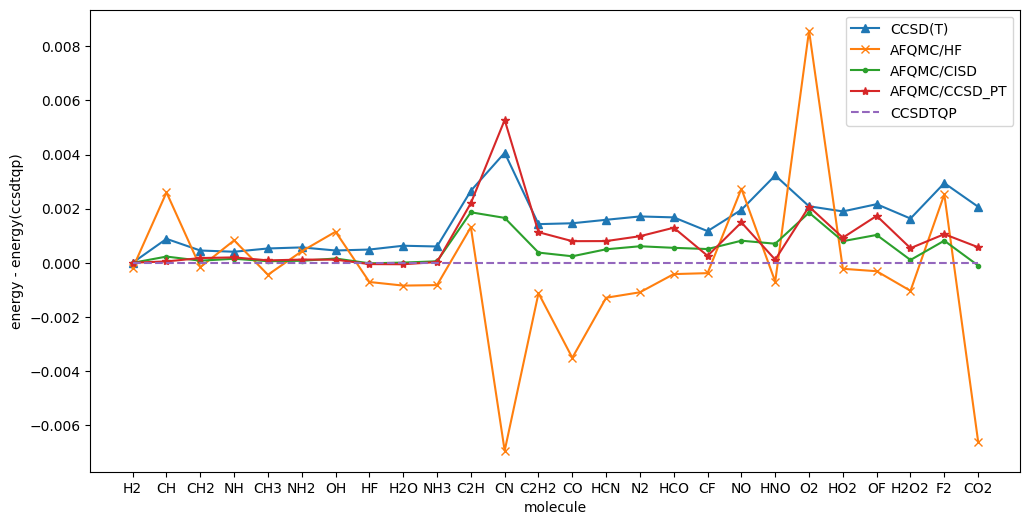

In [34]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(mols,ccsd_t-ccsdtqp,'^-',label='CCSD(T)')
plt.plot(mols,afqmc_hf-ccsdtqp,'x-',label='AFQMC/HF')
plt.plot(mols,afqmc_cisd-ccsdtqp,'.-',label='AFQMC/CISD')
plt.plot(mols,afqmc_ccsd_pt-ccsdtqp,'*-',label='AFQMC/CCSD_PT')
plt.plot(mols,[0]*len(mols),'--',label='CCSDTQP')
plt.xlabel('molecule')
plt.ylabel('energy - energy(ccsdtqp)')
plt.legend()
plt.show()

In [36]:
data_dic['CN']

{'ccsdtq': -92.492577,
 'ccsdtqp': -92.49276,
 'afqmc_hf': -92.4997,
 'afqmc_cisd': -92.4911,
 'afqmc_hf_err(mH)': 0.2,
 'afqmc_cisd_err(mH)': 0.1,
 'ccsd(t)': -92.48869527,
 'afqmc_ccsd_pt': -92.487483,
 'afqmc_ccsd_pt_err(mH)': 0.157}